In [1]:
%load_ext autoreload
%autoreload 2

In [2]:

import matplotlib.pyplot as plt
import random
import numpy as np

## initialize `G_baseline` network

In [3]:
random.seed(0)
np.random.seed(0)

N = 1000
INIT_EXPOSED = int(N*0.01)

from seirsplus.networks import generate_demographic_contact_network, household_country_data

demographic_graphs, individual_ageGroups, households = generate_demographic_contact_network(
                                                            N=N, demographic_data=household_country_data('US'), 
                                                            distancing_scales=[0.7], isolation_groups=[])

G = demographic_graphs['baseline']
# assign higher weights to inter-household edges
for e in G.edges():
    if "weight" not in G[e[0]][e[1]]:
        G[e[0]][e[1]]["weight"] = 10**10


Generated overall age distribution:
0-9: 0.1140	(-0.0070 from target)
10-19: 0.1310	(0.0000 from target)
20-29: 0.1410	(0.0040 from target)
30-39: 0.1440	(0.0110 from target)
40-49: 0.1170	(-0.0070 from target)
50-59: 0.1290	(-0.0020 from target)
60-69: 0.1020	(-0.0130 from target)
70-79: 0.0720	(0.0020 from target)
80+: 0.0500	(0.0120 from target)

Generated household size distribution:
1: 0.3259	(0.0422 from target)
2: 0.2988	(-0.0463 from target)
3: 0.1160	(-0.0346 from target)
4: 0.1481	(0.0205 from target)
5: 0.0691	(0.0114 from target)
6: 0.0346	(0.0119 from target)
7: 0.0074	(-0.0051 from target)
Num households: 405
mean household size: 2.448393594

Generating graph for 0-9...


/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/networkx/linalg/graphmatrix.py:187: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  return adjacency_matrix(G, nodelist, dtype, weight)


Generating graph for 10-19...
Generating graph for 20-59...
Generating graph for 60+...


In [4]:
from seirsplus.viral_model import ViralExtSEIRNetworkModel
from seirsplus.sim_loops_pooled_test import SimulationRunner

/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## correlated pooling

In [5]:
test_model = ViralExtSEIRNetworkModel(
    G = G,
    beta = 0.5,
    sigma = 0.2,
    lamda = 0.5,
    gamma  = 0.25,
    seed = 0,
    initE = INIT_EXPOSED)

sim_correlated = SimulationRunner(
    model=test_model,
    pooling_strategy='correlated',
    T = 50,
    num_groups = 10,
    pool_size = 30,
    seed = 0,
    save_results=False,
)

sim_correlated.run_simulation()

/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/networkx/linalg/graphmatrix.py:187: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  return adjacency_matrix(G, nodelist, dtype, weight)
Generating walks (CPU: 1): 100%|██████████| 10/10 [00:02<00:00,  3.94it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


{'t': 0.13998990588025415, 'transitionNode': 857, 'transitionNodeVL': 0.2887397194357262, 'transitionType': 'EtoIPRE'}


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 52.38it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


{'t': 0.13998990589621305, 'transitionNode': 858, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
{'t': 0.139989905904807, 'transitionNode': 856, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
{'t': 0.13998990723412597, 'transitionNode': 408, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
{'t': 0.13998990798918978, 'transitionNode': 409, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
{'t': 0.30012645946245076, 'transitionNode': 314, 'transitionNodeVL': 1.578029946615067, 'transitionType': 'EtoIPRE'}
{'t': 0.30012645948658967, 'transitionNode': 313, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
{'t': 0.30012645951236244, 'transitionNode': 312, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
{'t': 0.3001264596778919, 'transitionNode': 813, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
{'t': 0.30012646173440194, 'transitionNode': 814, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
{'t': 0.45409917468333527, 'transitionNode': 202, 'transitionNodeVL': 1.08034

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 70.63it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


{'t': 1.036528045204152, 'transitionNode': 300, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
{'t': 1.0365280454710024, 'transitionNode': 301, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
{'t': 1.0365280456264105, 'transitionNode': 298, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
{'t': 1.0365280470532412, 'transitionNode': 299, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
{'t': 1.1389844035582781, 'transitionNode': 312, 'transitionNodeVL': 3.0911561620653933, 'transitionType': 'EtoIPRE'}
{'t': 1.3262567956562386, 'transitionNode': 926, 'transitionNodeVL': 6.54142205303562, 'transitionType': 'EtoIPRE'}
{'t': 1.3262567957235079, 'transitionNode': 545, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
{'t': 1.3262567959916436, 'transitionNode': 925, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
{'t': 1.3262567961284772, 'transitionNode': 927, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
{'t': 1.3262567964232284, 'transitionNode': 546, 'transitionNodeVL'

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 39.07it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


{'t': 2.081414396568292, 'transitionNode': 300, 'transitionNodeVL': 8.424513206620695, 'transitionType': 'EtoIPRE'}
{'t': 2.2074919176699743, 'transitionNode': 807, 'transitionNodeVL': 8.592526577536233, 'transitionType': 'IPREtoISYM'}
{'t': 2.2093981481715073, 'transitionNode': 435, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
{'t': 2.364645329270079, 'transitionNode': 408, 'transitionNodeVL': 4.577327006174802, 'transitionType': 'EtoIPRE'}
{'t': 2.4075838360835946, 'transitionNode': 408, 'transitionNodeVL': 4.665674884635212, 'transitionType': 'IPREtoISYM'}
{'t': 2.4106540992456593, 'transitionNode': 576, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
{'t': 2.4769138092477228, 'transitionNode': 313, 'transitionNodeVL': 5.930620448427657, 'transitionType': 'EtoIPRE'}
{'t': 2.4910070839143104, 'transitionNode': 201, 'transitionNodeVL': 9.107952300029996, 'transitionType': 'EtoIPRE'}
{'t': 2.4997613775117853, 'transitionNode': 740, 'transitionNodeVL': 8.78452442477977, 'transi

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 50.07it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


{'t': 3.040601635531586, 'transitionNode': 409, 'transitionNodeVL': 7.980453209410714, 'transitionType': 'ISYMtoR'}
{'t': 3.043240150371981, 'transitionNode': 738, 'transitionNodeVL': 8.611240065916077, 'transitionType': 'IPREtoISYM'}
{'t': 3.0595189142815356, 'transitionNode': 782, 'transitionNodeVL': 5.452636984031772, 'transitionType': 'EtoIPRE'}
{'t': 3.0595189144893293, 'transitionNode': 255, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
{'t': 3.088868216298756, 'transitionNode': 739, 'transitionNodeVL': 6.728393242306364, 'transitionType': 'EtoIPRE'}
{'t': 3.0963087172869037, 'transitionNode': 926, 'transitionNodeVL': 6.54142205303562, 'transitionType': 'QPREtoQSYM'}
{'t': 3.3458010456148344, 'transitionNode': 255, 'transitionNodeVL': 1.2072286604171998, 'transitionType': 'EtoIPRE'}
{'t': 3.5059108461995434, 'transitionNode': 341, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
{'t': 3.611602242696454, 'transitionNode': 299, 'transitionNodeVL': 8.332272207225238, 'transit

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 30.80it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


{'t': 4.127368352527046, 'transitionNode': 435, 'transitionNodeVL': 8.265106945569746, 'transitionType': 'QEtoQPRE'}
{'t': 4.128730574410514, 'transitionNode': 814, 'transitionNodeVL': 9.177351175043656, 'transitionType': 'QPREtoQSYM'}
{'t': 4.245749724509129, 'transitionNode': 813, 'transitionNodeVL': 8.646333368151328, 'transitionType': 'QSYMtoQR'}
{'t': 4.26091749649425, 'transitionNode': 576, 'transitionNodeVL': 5.734598583017343, 'transitionType': 'QSYMtoQR'}
{'t': 4.263043807899495, 'transitionNode': 754, 'transitionNodeVL': 5.088481589118876, 'transitionType': 'IPREtoISYM'}
{'t': 4.3023526162706105, 'transitionNode': 753, 'transitionNodeVL': 6.820566579906652, 'transitionType': 'EtoIPRE'}
{'t': 4.433664603533082, 'transitionNode': 753, 'transitionNodeVL': 7.330400132980261, 'transitionType': 'IPREtoISYM'}
{'t': 4.554108171485378, 'transitionNode': 435, 'transitionNodeVL': 8.265106945569746, 'transitionType': 'QPREtoQSYM'}
{'t': 4.805676308739392, 'transitionNode': 201, 'transiti

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 27.94it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


{'t': 5.120566694300912, 'transitionNode': 782, 'transitionNodeVL': 7.901992054766001, 'transitionType': 'IPREtoISYM'}
{'t': 5.129963793468819, 'transitionNode': 926, 'transitionNodeVL': 6.4069236671047465, 'transitionType': 'QSYMtoQR'}
{'t': 5.133789036618763, 'transitionNode': 547, 'transitionNodeVL': 9.232792547847191, 'transitionType': 'QEtoQPRE'}
{'t': 5.309004389550236, 'transitionNode': 739, 'transitionNodeVL': 6.541296844790658, 'transitionType': 'IPREtoISYM'}
{'t': 5.31189437506175, 'transitionNode': 255, 'transitionNodeVL': 5.340503925952506, 'transitionType': 'IPREtoISYM'}
{'t': 5.4787159496109785, 'transitionNode': 338, 'transitionNodeVL': 8.646363197837772, 'transitionType': 'EtoIPRE'}
{'t': 5.536726463083756, 'transitionNode': 305, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
{'t': 5.561001316643178, 'transitionNode': 341, 'transitionNodeVL': 4.836246697642632, 'transitionType': 'IPREtoISYM'}
{'t': 5.705506232900658, 'transitionNode': 492, 'transitionNodeVL': 5.3070

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 35.92it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


{'t': 6.341685220189674, 'transitionNode': 298, 'transitionNodeVL': 8.932886527275732, 'transitionType': 'IPREtoISYM'}
{'t': 6.3678462814277, 'transitionNode': 959, 'transitionNodeVL': 5.070286328508536, 'transitionType': 'QPREtoQSYM'}
{'t': 6.5567638557935695, 'transitionNode': 858, 'transitionNodeVL': 8.794514251367659, 'transitionType': 'IPREtoISYM'}
{'t': 6.62257891275484, 'transitionNode': 351, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
{'t': 6.658503196964457, 'transitionNode': 546, 'transitionNodeVL': 8.396043083391557, 'transitionType': 'QPREtoQSYM'}
{'t': 6.725020404227056, 'transitionNode': 856, 'transitionNodeVL': 4.5946400419758415, 'transitionType': 'IPREtoISYM'}
{'t': 6.878622267298762, 'transitionNode': 779, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
{'t': 6.920501972469084, 'transitionNode': 754, 'transitionNodeVL': 4.608702745472828, 'transitionType': 'ISYMtoR'}
{'t': 7.029158590187304, 'transitionNode': 300, 'transitionNodeVL': 9.462946383343333, 'tran

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 56.88it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


{'t': 7.073068369598344, 'transitionNode': 313, 'transitionNodeVL': 5.165912186003278, 'transitionType': 'QSYMtoQR'}
{'t': 7.109581676842499, 'transitionNode': 547, 'transitionNodeVL': 8.505322099896233, 'transitionType': 'QPREtoQSYM'}
{'t': 7.17040851563742, 'transitionNode': 925, 'transitionNodeVL': 9.506273203136475, 'transitionType': 'QPREtoQSYM'}
{'t': 7.375306495168142, 'transitionNode': 351, 'transitionNodeVL': 3.265147003418752, 'transitionType': 'EtoIPRE'}
{'t': 7.4978449041663735, 'transitionNode': 812, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
{'t': 7.674072833627293, 'transitionNode': 812, 'transitionNodeVL': 0.8324717441725874, 'transitionType': 'EtoIPRE'}
{'t': 7.751757302463703, 'transitionNode': 255, 'transitionNodeVL': 5.29609000777838, 'transitionType': 'QSYMtoQR'}
{'t': 7.75771357239445, 'transitionNode': 311, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
{'t': 7.885187009119074, 'transitionNode': 272, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 52.28it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


{'t': 8.152418725152648, 'transitionNode': 272, 'transitionNodeVL': 1.5411093696211304, 'transitionType': 'EtoIPRE'}
{'t': 8.180519907020008, 'transitionNode': 245, 'transitionNodeVL': 6.533777358332487, 'transitionType': 'EtoIPRE'}
{'t': 8.196177159111405, 'transitionNode': 305, 'transitionNodeVL': 6.627863867496273, 'transitionType': 'EtoIPRE'}
{'t': 8.234039664773798, 'transitionNode': 591, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
{'t': 8.281488348468134, 'transitionNode': 305, 'transitionNodeVL': 6.627863867496273, 'transitionType': 'IPREtoISYM'}
{'t': 8.33206482433345, 'transitionNode': 779, 'transitionNodeVL': 3.8333738893648874, 'transitionType': 'EtoIPRE'}
{'t': 8.338525332216422, 'transitionNode': 329, 'transitionNodeVL': 9.728658346399268, 'transitionType': 'EtoIPRE'}
{'t': 8.347183204308955, 'transitionNode': 545, 'transitionNodeVL': 7.577191238600185, 'transitionType': 'QPREtoQSYM'}
{'t': 8.440207405722601, 'transitionNode': 329, 'transitionNodeVL': 9.728658346399

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 37.71it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


{'t': 9.355284991760595, 'transitionNode': 245, 'transitionNodeVL': 6.533777358332487, 'transitionType': 'ISYMtoR'}
{'t': 9.380867577612017, 'transitionNode': 546, 'transitionNodeVL': 6.552698537382958, 'transitionType': 'QSYMtoQR'}
{'t': 9.419834829526978, 'transitionNode': 351, 'transitionNodeVL': 6.062472233985353, 'transitionType': 'IPREtoISYM'}
{'t': 9.436022721293966, 'transitionNode': 380, 'transitionNodeVL': 0.40604083761834403, 'transitionType': 'EtoIPRE'}
{'t': 9.537254213552703, 'transitionNode': 591, 'transitionNodeVL': 5.105840730404994, 'transitionType': 'EtoIPRE'}
{'t': 9.621672255085084, 'transitionNode': 857, 'transitionNodeVL': 3.7768515206784414, 'transitionType': 'QPREtoQSYM'}
{'t': 9.800979300235063, 'transitionNode': 740, 'transitionNodeVL': 6.6459884295009495, 'transitionType': 'QSYMtoQR'}
{'t': 9.859829990677678, 'transitionNode': 591, 'transitionNodeVL': 6.369654538369288, 'transitionType': 'IPREtoISYM'}
{'t': 10.069239786485145, 'transitionNode': 723, 'transit

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 49.56it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


{'t': 10.480133204910866, 'transitionNode': 958, 'transitionNodeVL': 8.307819171719071, 'transitionType': 'EtoIPRE'}
{'t': 10.495572336915217, 'transitionNode': 314, 'transitionNodeVL': 3.709479995166871, 'transitionType': 'QSYMtoQR'}
{'t': 10.526796274243946, 'transitionNode': 316, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
{'t': 10.894261155006065, 'transitionNode': 272, 'transitionNodeVL': 8.840106102019064, 'transitionType': 'IPREtoISYM'}
{'t': 10.97150777821936, 'transitionNode': 807, 'transitionNodeVL': 6.637428240603112, 'transitionType': 'QSYMtoQR'}
{'t': 11.071705412565771, 'transitionNode': 566, 'transitionNodeVL': 8.573197085879555, 'transitionType': 'EtoIPRE'}


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 40.55it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


{'t': 11.321544852385367, 'transitionNode': 566, 'transitionNodeVL': 8.573197085879555, 'transitionType': 'IPREtoISYM'}
{'t': 11.340536806965696, 'transitionNode': 959, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
{'t': 11.359359700196906, 'transitionNode': 777, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
{'t': 11.469145251535853, 'transitionNode': 300, 'transitionNodeVL': 5.581400282315748, 'transitionType': 'QSYMtoQR'}
{'t': 11.5314663212835, 'transitionNode': 723, 'transitionNodeVL': 6.388772988491472, 'transitionType': 'QPREtoQSYM'}
{'t': 11.55818095291828, 'transitionNode': 419, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
{'t': 11.667607941654593, 'transitionNode': 958, 'transitionNodeVL': 7.796741366439043, 'transitionType': 'IPREtoISYM'}
{'t': 11.67369186913663, 'transitionNode': 739, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
{'t': 11.768169735309055, 'transitionNode': 508, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
{'t': 11.8643205

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 27.72it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


{'t': 12.070739481371845, 'transitionNode': 466, 'transitionNodeVL': 4.951079504325248, 'transitionType': 'QPREtoQSYM'}
{'t': 12.28456992275874, 'transitionNode': 311, 'transitionNodeVL': 8.579151696754666, 'transitionType': 'IPREtoISYM'}
{'t': 12.42591794175301, 'transitionNode': 363, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
{'t': 12.52024409907916, 'transitionNode': 549, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
{'t': 12.534175563343664, 'transitionNode': 508, 'transitionNodeVL': 2.085455842123438, 'transitionType': 'IPREtoISYM'}
{'t': 12.55737322012594, 'transitionNode': 341, 'transitionNodeVL': 3.9378313997901238, 'transitionType': 'ISYMtoR'}
{'t': 12.56517254320986, 'transitionNode': 522, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
{'t': 12.600116266592613, 'transitionNode': 779, 'transitionNodeVL': 5.876461905829506, 'transitionType': 'ISYMtoR'}
{'t': 12.626949332427284, 'transitionNode': 812, 'transitionNodeVL': 6.488983184004725, 'transitionType': 'IPR

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 60.70it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


{'t': 13.126194255084487, 'transitionNode': 466, 'transitionNodeVL': 4.454178246092977, 'transitionType': 'QSYMtoQR'}
{'t': 13.318700899821785, 'transitionNode': 522, 'transitionNodeVL': 3.4285215999915337, 'transitionType': 'IPREtoISYM'}
{'t': 13.352879954502477, 'transitionNode': 316, 'transitionNodeVL': 9.456718726570257, 'transitionType': 'EtoIPRE'}
{'t': 13.605894898355132, 'transitionNode': 753, 'transitionNodeVL': 4.77556346965218, 'transitionType': 'QSYMtoQR'}
{'t': 13.655446444160441, 'transitionNode': 492, 'transitionNodeVL': 7.214552244256003, 'transitionType': 'QPREtoQSYM'}
{'t': 13.679166899402613, 'transitionNode': 272, 'transitionNodeVL': 8.603722166506415, 'transitionType': 'ISYMtoR'}
{'t': 13.783733049260789, 'transitionNode': 338, 'transitionNodeVL': 6.60769343472956, 'transitionType': 'ISYMtoR'}
{'t': 13.833091949734543, 'transitionNode': 777, 'transitionNodeVL': 9.295460927340052, 'transitionType': 'EtoIPRE'}
{'t': 14.197948799391375, 'transitionNode': 831, 'transit

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 42.16it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


{'t': 14.292936916506626, 'transitionNode': 202, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
{'t': 14.365070920813563, 'transitionNode': 435, 'transitionNodeVL': 5.876380205069546, 'transitionType': 'QSYMtoQR'}
{'t': 14.399151833560706, 'transitionNode': 456, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
{'t': 14.406812983857225, 'transitionNode': 363, 'transitionNodeVL': 6.702590742304311, 'transitionType': 'QEtoQPRE'}
{'t': 14.662081032984169, 'transitionNode': 814, 'transitionNodeVL': 4.169063720692923, 'transitionType': 'QSYMtoQR'}
{'t': 14.697685074929927, 'transitionNode': 419, 'transitionNodeVL': 7.61415804466666, 'transitionType': 'QEtoQPRE'}
{'t': 14.772315250120071, 'transitionNode': 456, 'transitionNodeVL': 1.0635909617140196, 'transitionType': 'EtoIPRE'}
{'t': 14.898280262229477, 'transitionNode': 301, 'transitionNodeVL': 4.2112844012190305, 'transitionType': 'QEtoQPRE'}
{'t': 14.937825243330206, 'transitionNode': 301, 'transitionNodeVL': 4.2112844012190305

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 34.31it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


{'t': 15.196489875446593, 'transitionNode': 545, 'transitionNodeVL': 5.600418199867308, 'transitionType': 'QSYMtoQR'}
{'t': 15.223245236466843, 'transitionNode': 250, 'transitionNodeVL': 5.413206506053991, 'transitionType': 'EtoIPRE'}
{'t': 15.463121375213104, 'transitionNode': 456, 'transitionNodeVL': 3.0325276750714747, 'transitionType': 'IPREtoISYM'}
{'t': 15.574024923947347, 'transitionNode': 250, 'transitionNodeVL': 6.291554946542807, 'transitionType': 'IPREtoISYM'}
{'t': 15.746093137872927, 'transitionNode': 351, 'transitionNodeVL': 4.301019390586492, 'transitionType': 'QSYMtoQR'}
{'t': 15.749629494849366, 'transitionNode': 285, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
{'t': 16.099376964787947, 'transitionNode': 285, 'transitionNodeVL': 1.2623555616217221, 'transitionType': 'EtoIPRE'}


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 68.68it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


{'t': 16.57890835248406, 'transitionNode': 857, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
{'t': 16.60645364667782, 'transitionNode': 309, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
{'t': 16.879853082946294, 'transitionNode': 419, 'transitionNodeVL': 7.325736790270152, 'transitionType': 'QPREtoQSYM'}
{'t': 17.030418012398922, 'transitionNode': 309, 'transitionNodeVL': 2.4285424845731147, 'transitionType': 'EtoIPRE'}


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 53.37it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


{'t': 17.058093426947877, 'transitionNode': 350, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
{'t': 17.099160178788676, 'transitionNode': 812, 'transitionNodeVL': 3.840560755925777, 'transitionType': 'QSYMtoQR'}
{'t': 17.43095707901425, 'transitionNode': 312, 'transitionNodeVL': -1.0, 'transitionType': 'ISYMtoR'}
{'t': 17.55182115379386, 'transitionNode': 329, 'transitionNodeVL': 5.225537315509102, 'transitionType': 'QSYMtoQR'}
{'t': 17.625206437589892, 'transitionNode': 350, 'transitionNodeVL': 3.1898382947633324, 'transitionType': 'EtoIPRE'}
{'t': 18.707865926192444, 'transitionNode': 380, 'transitionNodeVL': 3.7016847938131647, 'transitionType': 'IPREtoISYM'}


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 46.23it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


{'t': 18.826665232491035, 'transitionNode': 777, 'transitionNodeVL': 7.222112289343658, 'transitionType': 'QPREtoQSYM'}
{'t': 19.11023224880413, 'transitionNode': 309, 'transitionNodeVL': 6.144091625664936, 'transitionType': 'IPREtoISYM'}


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 30.71it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


{'t': 19.230456836285917, 'transitionNode': 464, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
{'t': 19.43002713723853, 'transitionNode': 549, 'transitionNodeVL': 8.886852952810228, 'transitionType': 'QPREtoQSYM'}
{'t': 19.449844385972906, 'transitionNode': 471, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
{'t': 19.525931272944486, 'transitionNode': 363, 'transitionNodeVL': 8.633703412241383, 'transitionType': 'QPREtoQSYM'}
{'t': 19.730425375985725, 'transitionNode': 363, 'transitionNodeVL': 8.502255710974637, 'transitionType': 'QSYMtoQR'}
{'t': 20.097302035244574, 'transitionNode': 464, 'transitionNodeVL': 3.3035853522174934, 'transitionType': 'EtoIPRE'}


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 51.41it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


{'t': 20.4888091705381, 'transitionNode': 668, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
{'t': 20.60917539349881, 'transitionNode': 471, 'transitionNodeVL': 6.906038985618666, 'transitionType': 'EtoIPRE'}
{'t': 20.63304642568883, 'transitionNode': 858, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
{'t': 20.714274037166508, 'transitionNode': 380, 'transitionNodeVL': -1.0, 'transitionType': 'ISYMtoR'}
{'t': 20.734854639207633, 'transitionNode': 456, 'transitionNodeVL': 5.973617697076154, 'transitionType': 'ISYMtoR'}
{'t': 20.91082622523905, 'transitionNode': 668, 'transitionNodeVL': 1.6747505447237512, 'transitionType': 'EtoIPRE'}
{'t': 21.07220738801784, 'transitionNode': 856, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 45.46it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


{'t': 21.260891882823447, 'transitionNode': 408, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
{'t': 21.55359071430114, 'transitionNode': 464, 'transitionNodeVL': 8.853565849901356, 'transitionType': 'IPREtoISYM'}
{'t': 21.59722464544491, 'transitionNode': 419, 'transitionNodeVL': 5.692285704366872, 'transitionType': 'QSYMtoQR'}
{'t': 21.941269274050367, 'transitionNode': 285, 'transitionNodeVL': 8.633104727568183, 'transitionType': 'IPREtoISYM'}
{'t': 22.3663842689329, 'transitionNode': 410, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 25.21it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


{'t': 22.391204827054906, 'transitionNode': 394, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
{'t': 22.3927500380432, 'transitionNode': 471, 'transitionNodeVL': 6.906038985618666, 'transitionType': 'QPREtoQSYM'}
{'t': 22.418600010817727, 'transitionNode': 201, 'transitionNodeVL': -1.0, 'transitionType': 'ISYMtoR'}
{'t': 22.69643668358407, 'transitionNode': 723, 'transitionNodeVL': -1.0, 'transitionType': 'ISYMtoR'}
{'t': 23.260696343942413, 'transitionNode': 668, 'transitionNodeVL': 8.88465795366445, 'transitionType': 'IPREtoISYM'}


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 37.18it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


{'t': 23.994341092894054, 'transitionNode': 668, 'transitionNodeVL': 8.88465795366445, 'transitionType': 'ISYMtoR'}
{'t': 24.040937037645843, 'transitionNode': 508, 'transitionNodeVL': 5.44713880375256, 'transitionType': 'QSYMtoQR'}


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 50.45it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


{'t': 24.735234455672565, 'transitionNode': 350, 'transitionNodeVL': 7.385267314839461, 'transitionType': 'QPREtoQSYM'}
{'t': 24.81070151842749, 'transitionNode': 339, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
{'t': 24.826024950908515, 'transitionNode': 394, 'transitionNodeVL': 9.665965946200824, 'transitionType': 'QEtoQPRE'}
{'t': 25.1432046126083, 'transitionNode': 984, 'transitionNodeVL': -1.0, 'transitionType': 'ISYMtoR'}


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 55.01it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


{'t': 25.165671991403528, 'transitionNode': 394, 'transitionNodeVL': 9.665965946200824, 'transitionType': 'QPREtoQSYM'}
{'t': 25.177783887477915, 'transitionNode': 547, 'transitionNodeVL': -1.0, 'transitionType': 'ISYMtoR'}
{'t': 25.278765878702707, 'transitionNode': 831, 'transitionNodeVL': 6.381286220332547, 'transitionType': 'QEtoQPRE'}
{'t': 25.6237651399755, 'transitionNode': 309, 'transitionNodeVL': 4.26973170971349, 'transitionType': 'QSYMtoQR'}
{'t': 26.308270052030796, 'transitionNode': 410, 'transitionNodeVL': 9.361356718962075, 'transitionType': 'QEtoQPRE'}


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 57.81it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


{'t': 27.38577197835386, 'transitionNode': 250, 'transitionNodeVL': -1.0, 'transitionType': 'ISYMtoR'}


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 35.79it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


{'t': 27.538020434703657, 'transitionNode': 831, 'transitionNodeVL': 5.38835710032936, 'transitionType': 'QPREtoQSYM'}
{'t': 27.7724344774799, 'transitionNode': 394, 'transitionNodeVL': 9.388082225745881, 'transitionType': 'QSYMtoQR'}
{'t': 27.91740268457514, 'transitionNode': 410, 'transitionNodeVL': 8.48266575008106, 'transitionType': 'QPREtoQSYM'}
{'t': 28.61187824613337, 'transitionNode': 609, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 54.60it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


{'t': 29.017505978015077, 'transitionNode': 316, 'transitionNodeVL': -1.0, 'transitionType': 'ISYMtoR'}


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 58.87it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


{'t': 29.671319956237532, 'transitionNode': 464, 'transitionNodeVL': 5.5622465308054405, 'transitionType': 'QSYMtoQR'}
{'t': 31.393051730483037, 'transitionNode': 591, 'transitionNodeVL': -1.0, 'transitionType': 'ISYMtoR'}


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 39.63it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 27.92it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_i

{'t': 32.081010576444136, 'transitionNode': 777, 'transitionNodeVL': -1.0, 'transitionType': 'ISYMtoR'}


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 49.92it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


{'t': 32.410188302137705, 'transitionNode': 471, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
{'t': 33.09135970637128, 'transitionNode': 621, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 36.05it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


{'t': 33.30599401870694, 'transitionNode': 566, 'transitionNodeVL': -1.0, 'transitionType': 'ISYMtoR'}
{'t': 33.31172742946212, 'transitionNode': 339, 'transitionNodeVL': 7.593822682631447, 'transitionType': 'EtoIPRE'}
{'t': 33.61658290989652, 'transitionNode': 621, 'transitionNodeVL': 4.708238761811126, 'transitionType': 'EtoIPRE'}
{'t': 33.67022243158347, 'transitionNode': 670, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
{'t': 34.98281529469469, 'transitionNode': 301, 'transitionNodeVL': -1.0, 'transitionType': 'ISYMtoR'}


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 46.10it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


{'t': 34.99436782518391, 'transitionNode': 411, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
{'t': 35.43761704505855, 'transitionNode': 831, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 52.86it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


{'t': 35.823058969230246, 'transitionNode': 621, 'transitionNodeVL': 9.327515214848441, 'transitionType': 'QPREtoQSYM'}
{'t': 36.026615792010595, 'transitionNode': 670, 'transitionNodeVL': 7.7807338405416875, 'transitionType': 'QEtoQPRE'}


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 52.89it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


{'t': 37.301684466893214, 'transitionNode': 304, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 32.25it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


{'t': 37.994069299012644, 'transitionNode': 311, 'transitionNodeVL': -1.0, 'transitionType': 'ISYMtoR'}
{'t': 38.62512049130766, 'transitionNode': 621, 'transitionNodeVL': 9.039933799847347, 'transitionType': 'QSYMtoQR'}


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 53.95it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


{'t': 39.103719533816786, 'transitionNode': 304, 'transitionNodeVL': 8.552523249093877, 'transitionType': 'EtoIPRE'}


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 58.29it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


{'t': 39.28045087758956, 'transitionNode': 411, 'transitionNodeVL': 5.336455627018164, 'transitionType': 'EtoIPRE'}
{'t': 39.74904444181603, 'transitionNode': 549, 'transitionNodeVL': -1.0, 'transitionType': 'ISYMtoR'}
{'t': 39.81717157119125, 'transitionNode': 641, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
{'t': 40.01221321045207, 'transitionNode': 304, 'transitionNodeVL': 9.389016053988337, 'transitionType': 'IPREtoISYM'}


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 35.91it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


{'t': 40.08018139839147, 'transitionNode': 339, 'transitionNodeVL': 5.809345167344551, 'transitionType': 'QPREtoQSYM'}
{'t': 40.17089722490696, 'transitionNode': 551, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
{'t': 40.179309837072665, 'transitionNode': 670, 'transitionNodeVL': 7.44490708505396, 'transitionType': 'QPREtoQSYM'}
{'t': 40.28908654648257, 'transitionNode': 551, 'transitionNodeVL': 0.4378727710718072, 'transitionType': 'EtoIPRE'}
{'t': 42.58783399210027, 'transitionNode': 551, 'transitionNodeVL': 5.241048206156329, 'transitionType': 'IPREtoISYM'}


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 31.03it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 39.33it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_i

{'t': 43.251944141279864, 'transitionNode': 641, 'transitionNodeVL': 8.237438648460422, 'transitionType': 'EtoIPRE'}


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 52.39it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


{'t': 43.53515315097187, 'transitionNode': 411, 'transitionNodeVL': 3.9104093980318995, 'transitionType': 'IPREtoISYM'}
{'t': 44.18825815915071, 'transitionNode': 304, 'transitionNodeVL': 8.588696800663278, 'transitionType': 'ISYMtoR'}


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 28.44it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


{'t': 44.92976677274158, 'transitionNode': 609, 'transitionNodeVL': -1.0, 'transitionType': 'QEtoQPRE'}
{'t': 45.65034899997711, 'transitionNode': 738, 'transitionNodeVL': -1.0, 'transitionType': 'ISYMtoR'}


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 31.56it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


{'t': 45.75634319250606, 'transitionNode': 609, 'transitionNodeVL': -1.0, 'transitionType': 'QPREtoQSYM'}
{'t': 45.83166058514522, 'transitionNode': 475, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
{'t': 46.11232218284225, 'transitionNode': 609, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 50.09it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


{'t': 46.15488233426804, 'transitionNode': 475, 'transitionNodeVL': 2.4295001219731724, 'transitionType': 'EtoIPRE'}
{'t': 47.47352163255274, 'transitionNode': 475, 'transitionNodeVL': 8.261992226647102, 'transitionType': 'IPREtoISYM'}


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 29.81it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


{'t': 47.62258619146039, 'transitionNode': 350, 'transitionNodeVL': -1.0, 'transitionType': 'ISYMtoR'}
{'t': 47.67296037404366, 'transitionNode': 670, 'transitionNodeVL': 4.734706164282338, 'transitionType': 'QSYMtoQR'}
{'t': 47.89765806659519, 'transitionNode': 410, 'transitionNodeVL': -1.0, 'transitionType': 'ISYMtoR'}
{'t': 47.92700196033023, 'transitionNode': 389, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
{'t': 48.46414884637898, 'transitionNode': 411, 'transitionNodeVL': -1.0, 'transitionType': 'ISYMtoR'}


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 56.04it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


{'t': 49.14106838156151, 'transitionNode': 431, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 50.35it/s]


{'t': 50.120717532582, 'transitionNode': 475, 'transitionNodeVL': 8.261992226647102, 'transitionType': 'ISYMtoR'}


/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


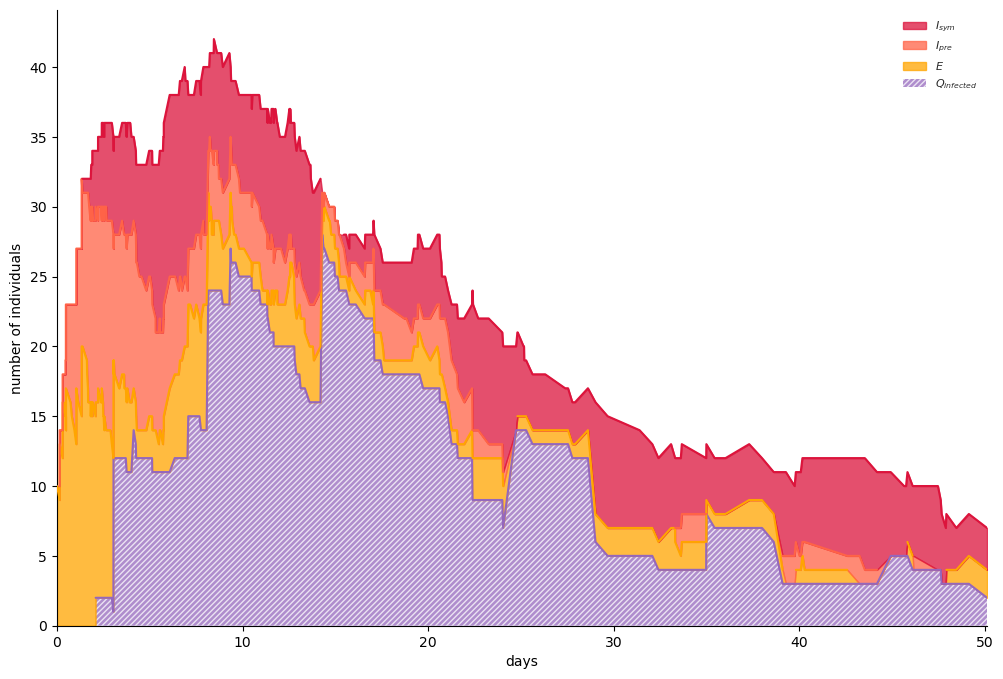

(<Figure size 1200x800 with 1 Axes>,
 <Axes: xlabel='days', ylabel='number of individuals'>)

In [6]:
sim_correlated.model.figure_infections(plot_percentages=False)

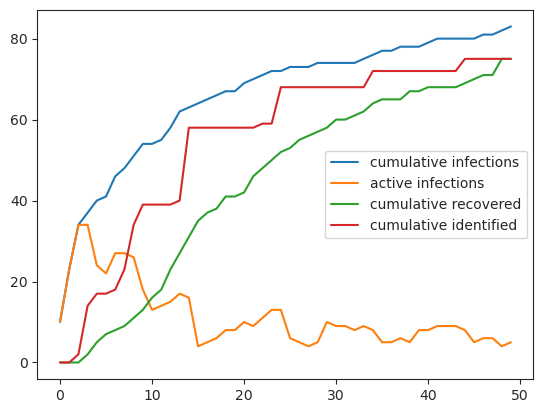

In [14]:
plt.plot([sim_correlated.overall_results[i]["cumInfections"] for i in range(len(sim_correlated.overall_results))], label="cumulative infections")
plt.plot([sim_correlated.overall_results[i]["cumActiveInfections"] for i in range(len(sim_correlated.overall_results))], label="active infections")
plt.plot([sim_correlated.overall_results[i]["cumRecovered"] for i in range(len(sim_correlated.overall_results))], label="cumulative recovered")
plt.plot([sim_correlated.overall_results[i]["cum_positives_identified"] for i in range(len(sim_correlated.overall_results))], label="cumulative identified")

plt.legend()

## Naive pooling

In [15]:
random.seed(0)
np.random.seed(0)

N = 1000
INIT_EXPOSED = int(N*0.01)

from seirsplus.networks import generate_demographic_contact_network, household_country_data

demographic_graphs, individual_ageGroups, households = generate_demographic_contact_network(
                                                            N=N, demographic_data=household_country_data('US'), 
                                                            distancing_scales=[0.7], isolation_groups=[])

G = demographic_graphs['baseline']
# assign higher weights to inter-household edges
for e in G.edges():
    if "weight" not in G[e[0]][e[1]]:
        G[e[0]][e[1]]["weight"] = 10**10


Generated overall age distribution:
0-9: 0.1140	(-0.0070 from target)
10-19: 0.1310	(0.0000 from target)
20-29: 0.1410	(0.0040 from target)
30-39: 0.1440	(0.0110 from target)
40-49: 0.1170	(-0.0070 from target)
50-59: 0.1290	(-0.0020 from target)
60-69: 0.1020	(-0.0130 from target)
70-79: 0.0720	(0.0020 from target)
80+: 0.0500	(0.0120 from target)

Generated household size distribution:
1: 0.3259	(0.0422 from target)
2: 0.2988	(-0.0463 from target)
3: 0.1160	(-0.0346 from target)
4: 0.1481	(0.0205 from target)
5: 0.0691	(0.0114 from target)
6: 0.0346	(0.0119 from target)
7: 0.0074	(-0.0051 from target)
Num households: 405
mean household size: 2.448393594

Generating graph for 0-9...


/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/networkx/linalg/graphmatrix.py:187: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  return adjacency_matrix(G, nodelist, dtype, weight)


Generating graph for 10-19...
Generating graph for 20-59...
Generating graph for 60+...


In [16]:
test_model = ViralExtSEIRNetworkModel(
    G = G,
    beta = 0.5,
    sigma = 0.2,
    lamda = 0.5,
    gamma  = 0.25,
    seed = 0,
    initE = INIT_EXPOSED)

sim_naive = SimulationRunner(
    model = test_model,
    pooling_strategy='naive',
    T = 50,
    num_groups = 10,
    pool_size = 30,
    seed = 0,
    save_results = False
)

sim_naive.run_simulation()

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:02<00:00,  4.09it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


{'t': 0.13998990588025415, 'transitionNode': 857, 'transitionNodeVL': 0.2887397194357262, 'transitionType': 'EtoIPRE'}
{'t': 0.13998990598502606, 'transitionNode': 858, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
{'t': 0.13998990622491872, 'transitionNode': 409, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
{'t': 0.13998990674621098, 'transitionNode': 408, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
{'t': 0.13998990747582382, 'transitionNode': 856, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
{'t': 0.23063898889353207, 'transitionNode': 409, 'transitionNodeVL': 0.5122112670763327, 'transitionType': 'EtoIPRE'}
{'t': 0.36854799615552813, 'transitionNode': 807, 'transitionNodeVL': 1.4345504174740702, 'transitionType': 'EtoIPRE'}
{'t': 0.36854799621290596, 'transitionNode': 299, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
{'t': 0.36854799623393836, 'transitionNode': 301, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
{'t': 0.36854799744284855, 'transitio

/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


{'t': 3.964706840394276, 'transitionNode': 858, 'transitionNodeVL': 9.590964305119163, 'transitionType': 'IPREtoISYM'}
{'t': 4.099017421296555, 'transitionNode': 814, 'transitionNodeVL': 5.4833110202794595, 'transitionType': 'EtoIPRE'}
{'t': 4.102249705791974, 'transitionNode': 670, 'transitionNodeVL': 4.40863995573155, 'transitionType': 'EtoIPRE'}
{'t': 4.119753227278711, 'transitionNode': 254, 'transitionNodeVL': 9.603446900672036, 'transitionType': 'ISYMtoR'}
{'t': 4.1625492894801415, 'transitionNode': 248, 'transitionNodeVL': 5.765414348824173, 'transitionType': 'QEtoQPRE'}
{'t': 4.167097012925803, 'transitionNode': 341, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
{'t': 4.314332243427623, 'transitionNode': 858, 'transitionNodeVL': 9.590964305119163, 'transitionType': 'ISYMtoR'}
{'t': 4.507292605212344, 'transitionNode': 312, 'transitionNodeVL': 6.249686674538711, 'transitionType': 'IPREtoISYM'}
{'t': 4.626765296837072, 'transitionNode': 408, 'transitionNodeVL': 5.93331612466

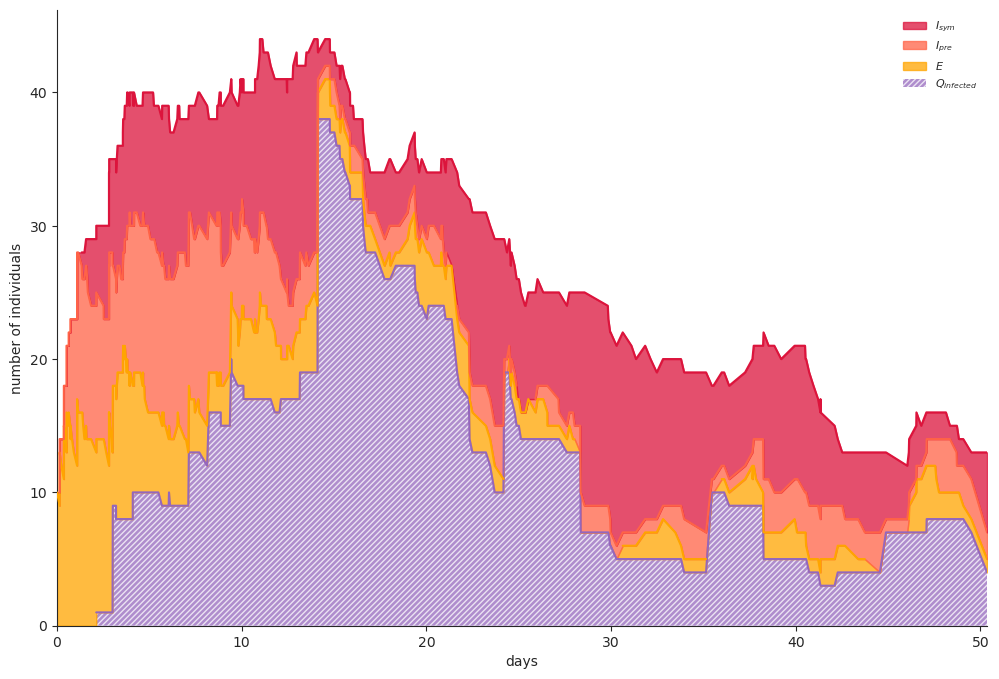

(<Figure size 1200x800 with 1 Axes>,
 <Axes: xlabel='days', ylabel='number of individuals'>)

In [17]:
sim_naive.model.figure_infections(plot_percentages=False)

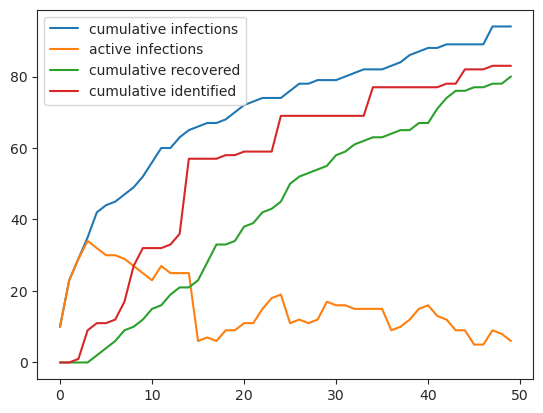

In [18]:
plt.plot([sim_naive.overall_results[i]["cumInfections"] for i in range(len(sim_correlated.overall_results))], label="cumulative infections")
plt.plot([sim_naive.overall_results[i]["cumActiveInfections"] for i in range(len(sim_correlated.overall_results))], label="active infections")
plt.plot([sim_naive.overall_results[i]["cumRecovered"] for i in range(len(sim_correlated.overall_results))], label="cumulative recovered")
plt.plot([sim_naive.overall_results[i]["cum_positives_identified"] for i in range(len(sim_correlated.overall_results))], label="cumulative identified")

plt.legend()

In [19]:
metrics = sim_correlated.overall_results[0].keys()
metrics = set(metrics) - {"day"}

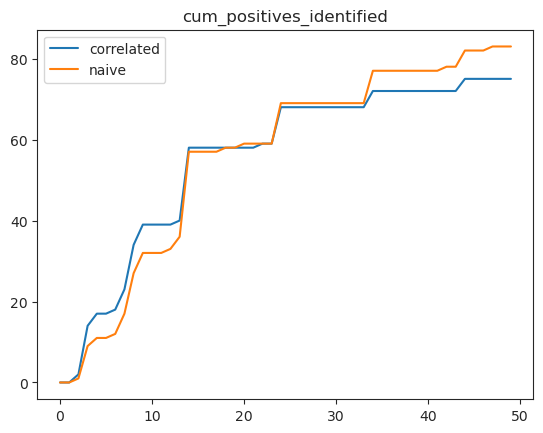

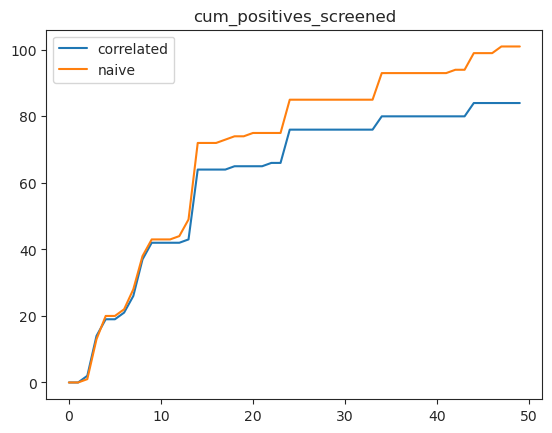

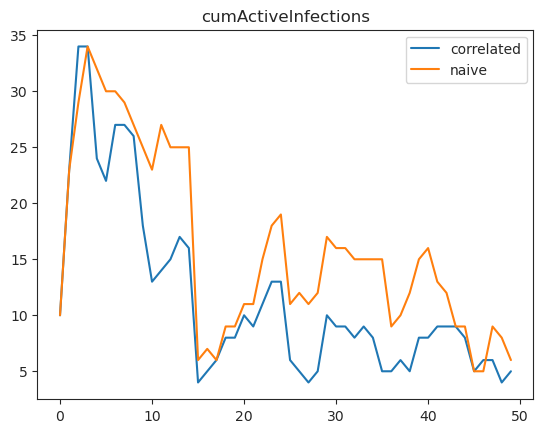

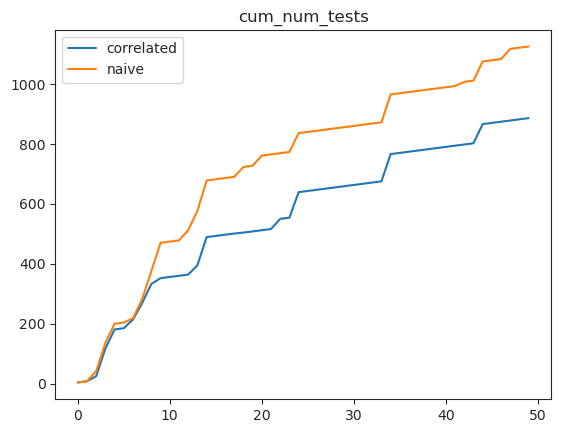

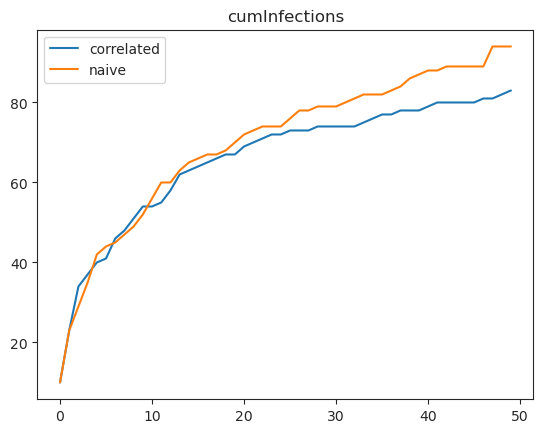

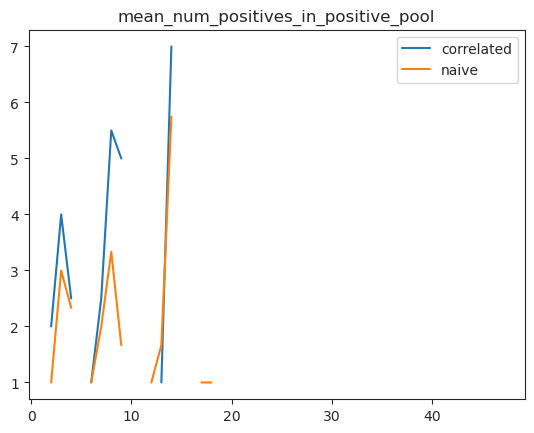

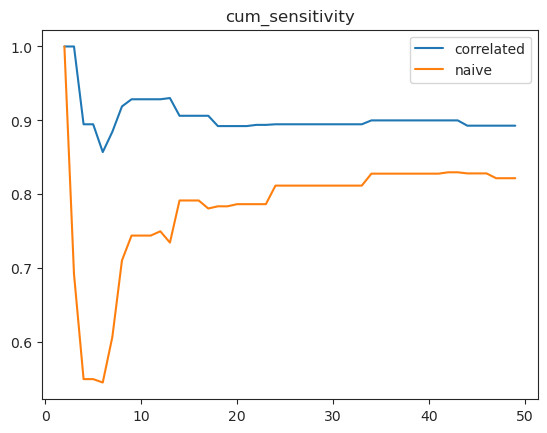

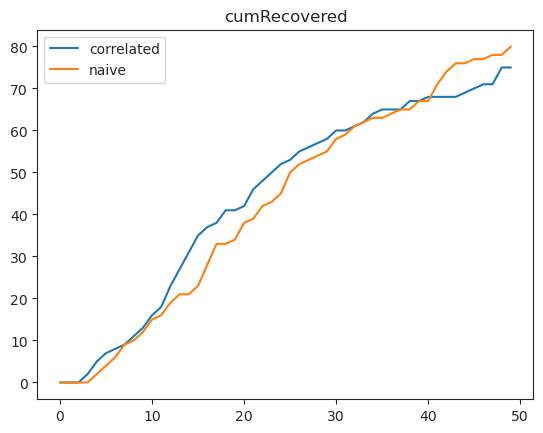

In [20]:
for metric in metrics:
    plt.plot([result[metric] for result in sim_correlated.overall_results])
    plt.plot([result[metric] for result in sim_naive.overall_results])
    plt.title(metric)
    plt.legend(['correlated', 'naive'])
    plt.show()